## Here 100 uL of AuSS + 20uL AuNR both with DNA2 were taken in a microcuvette having 100uL H2O + 25uL of 2M NaCl. The temperature was 15C.

For kinetics, each spectrum was taken in 30 second intervals. 

In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta
from natsort import natsorted

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2024-02-01-100ns-20nr-25nacl-100h2o-7bp2-assembly-kinetics', '')
DATA_UV_DIR_PATH_REVERSIBILITY = os.path.join(BASE_DIR_PATH, 'data','UV-Vis-NIR','2024-02-22-100n-20nr-25nacl-100h2o-7bp2-reveribility', '')
DATA_UV_DIR_PATH_2_5A_REDISP = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2024-04-12-100ns-20nr-blablabla_2-5a-notempcont-redip-kinet', '')
# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')

In [3]:
'''
Import data from the folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df = pd.read_csv(DATA_UV_DIR_PATH+'Export Data ar-2024-02-01-aunr-auns-dna2-assembly-kinet_15c.csv', skiprows=1)

# Get the odd columns and even columns
odd_cols = df.iloc[:, 1::2]  # start from index 1 and select every other column

# Get number of columns
num_cols = len(odd_cols.columns)

# Create color list
colors = ['red'] + ['grey']*(num_cols-3) + ['blue']

# odd_cols.to_csv(RESULT_DIR_PATH_CSV + 'odd_cols.csv')
#df.loc[430] # For abs at 670 nm

#df.loc[430]/(1.456E-4) # For ext. cross section at 670 nm

#df.loc[700] # For abs at 400 nm
odd_cols

,Abs,Abs.1,Abs.2,Abs.3,Abs.4,Abs.5,Abs.6,Abs.7,Abs.8,Abs.9,...,Abs.111,Abs.112,Abs.113,Abs.114,Abs.115,Abs.116,Abs.117,Abs.118,Abs.119,Abs.120
0,0.024392,0.028327,0.025752,0.025853,0.025738,0.026336,0.032495,0.034034,0.046836,0.062844,...,0.182878,0.180151,0.176470,0.168963,0.167420,0.167753,0.160196,0.156753,0.153737,0.144980
1,0.025511,0.025175,0.025123,0.021736,0.024790,0.022616,0.025991,0.032575,0.041705,0.056194,...,0.180248,0.178845,0.173841,0.170133,0.164261,0.162456,0.158844,0.157963,0.148742,0.144891
2,0.026196,0.027711,0.023385,0.024065,0.025226,0.025070,0.026254,0.033461,0.040412,0.059877,...,0.183517,0.175683,0.177049,0.168846,0.167405,0.161836,0.158562,0.153922,0.154257,0.148308
3,0.022814,0.022973,0.023870,0.024759,0.020508,0.019464,0.024667,0.031373,0.044274,0.054431,...,0.181003,0.177661,0.174487,0.171392,0.163722,0.162940,0.159314,0.155459,0.152826,0.149113
4,0.024709,0.019556,0.027182,0.023236,0.023513,0.024137,0.025407,0.031298,0.041105,0.058269,...,0.182367,0.178687,0.174404,0.172899,0.163352,0.163879,0.161610,0.153262,0.151299,0.146623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.873635,1.874831,1.874252,1.874626,1.875098,1.871078,1.857225,1.822449,1.767694,1.699485,...,0.680478,0.670055,0.660356,0.650197,0.640970,0.631379,0.621978,0.612572,0.603754,0.595103
797,1.885658,1.887051,1.886866,1.888263,1.887713,1.884294,1.869527,1.833701,1.777472,1.708160,...,0.683044,0.672606,0.662541,0.652902,0.643248,0.633678,0.624628,0.615315,0.606457,0.597576
798,1.898224,1.898810,1.898732,1.899001,1.898479,1.894922,1.880286,1.843017,1.786429,1.716292,...,0.685226,0.674732,0.664824,0.654916,0.645471,0.636095,0.626707,0.617427,0.608240,0.599617
799,1.910507,1.911667,1.911638,1.911959,1.911650,1.907626,1.892504,1.855416,1.796570,1.725241,...,0.688103,0.677648,0.667635,0.657579,0.648218,0.638837,0.629379,0.620059,0.611132,0.602383


In [4]:
lspr_abs = odd_cols[:451]

In [5]:
tspr_abs = odd_cols[451:]

In [6]:
df.iloc[415]

Wavelength (nm)        685.000000
Abs                      2.117855
Wavelength (nm).1      685.000000
Abs.1                    2.114832
Wavelength (nm).2      685.000000
                          ...    
Abs.118                  1.172118
Wavelength (nm).119    685.000000
Abs.119                  1.162168
Wavelength (nm).120    685.000000
Abs.120                  1.152987
Name: 415, Length: 242, dtype: float64

In [7]:
odd_cols.iloc[415]

Abs        2.117855
Abs.1      2.114832
Abs.2      2.094764
Abs.3      2.072508
Abs.4      2.038940
             ...   
Abs.116    1.195224
Abs.117    1.183191
Abs.118    1.172118
Abs.119    1.162168
Abs.120    1.152987
Name: 415, Length: 121, dtype: float64

# Plotting the kinetics for 30 mins

In [9]:
df_30min = df.iloc[:,14:80]

# Get the odd columns and even columns
odd_cols_30 = df_30min.iloc[:, 1::2]  # start from index 1 and select every other column

# Get number of columns
num_cols_30 = len(odd_cols_30.columns)

# Create color list
colors = ['red'] + ['grey']*(num_cols_30-3) + ['blue']

# odd_cols.to_csv(RESULT_DIR_PATH_CSV + 'odd_cols.csv')
#df.loc[430] # For abs at 670 nm

#df.loc[430]/(1.456E-4) # For ext. cross section at 670 nm

#df.loc[700] # For abs at 400 nm
odd_cols_30

lspr_abs_30 = odd_cols_30[:451]
tspr_abs_30 = odd_cols_30[451:]

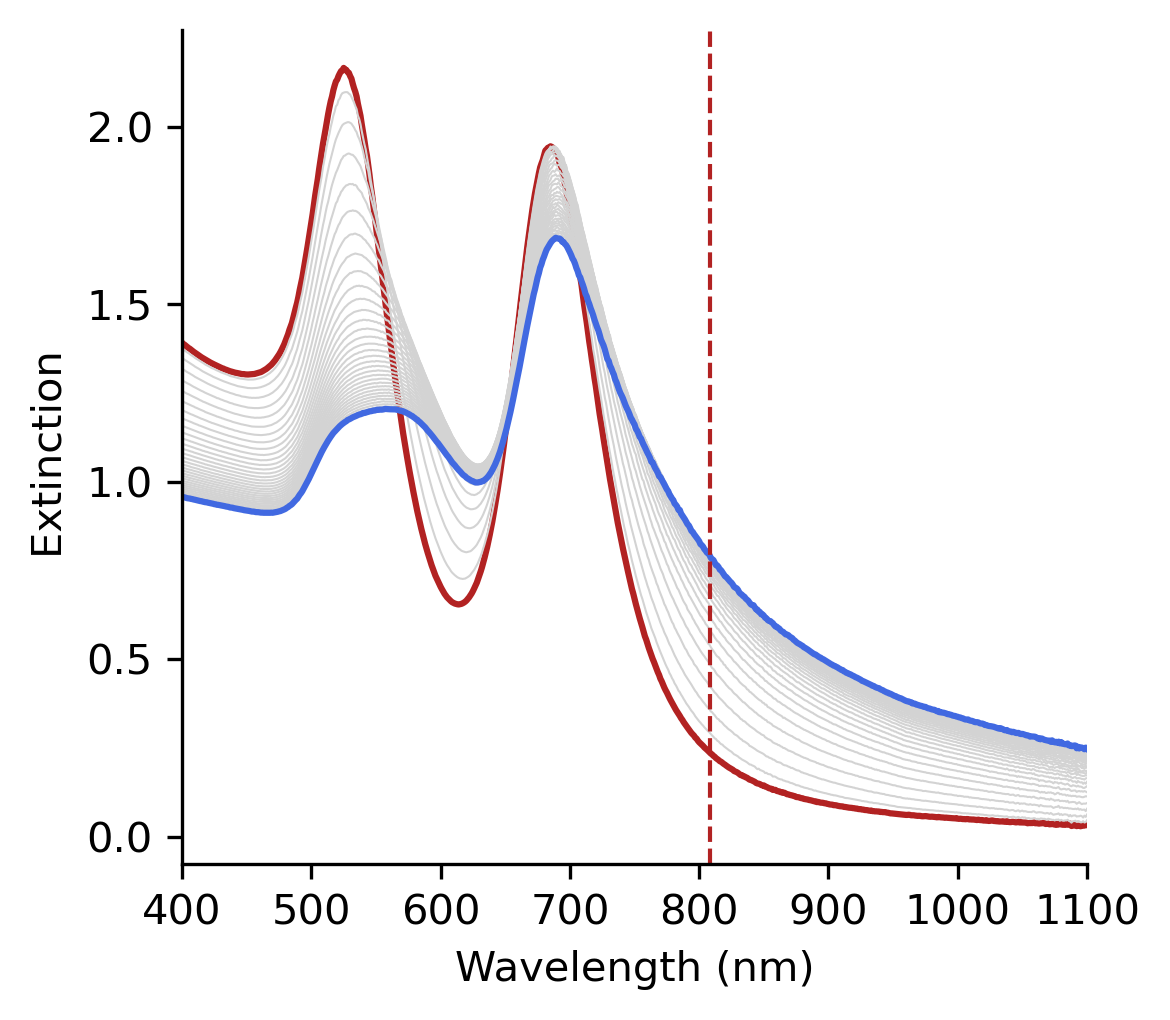

In [10]:
#================ plot data showing aggregation ===========================#

fig = plt.figure(figsize=(4,3.5), dpi=300) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for col in odd_cols_30:
    if col == 'Abs.7':
        color = 'firebrick'
        linewidth = 1.5
    elif col == 'Abs.39':
        color = 'royalblue'
        linewidth = 1.5
    else:
        color = 'lightgrey'
        linewidth = 0.5
    
    ax.plot(df_30min.iloc[:, 0], odd_cols_30[col], color = color, linewidth = linewidth)                           # plot data    
    
ax.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
#ax.axvline(685, color = 'royalblue', linewidth = 1, linestyle = '--')
ax.axvline(808, color = 'firebrick', linewidth = 1, linestyle = '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.savefig(RESULT_DIR_PATH+'Fig_2b.pdf')

In [11]:
# Obtian the abs. max and the corresponding wavelength

abs_520_30 = []
times_30 = []

for col in odd_cols_30:
    absorbance = round(tspr_abs_30[col].max(),2)
    abs_520_30.append(absorbance)
    
print(abs_520_30)

for time in (range(33)):
    times_30.append(time)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, abs_520_30)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,33)

# fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick', linewidth = 1)
# ax_kin.scatter(times_30, abs_520_30, color='black', s=10)                           # plot data
# ax_kin.scatter(times_30, abs_520_30, color='royalblue', s=6)                           # plot data

# #ax_kin.set_xlim([0,30])                    # set wavelength limit

# #ax_kin.set_ylim([0,0.7])                       # set absorbance limit
# ax_kin.set_xlabel(r'Time (min)')          # set axis label
# ax_kin.set_ylabel(r'Ext. at tspr')              # set axis label
# ax_kin.spines['top'].set_visible(False)
# ax_kin.spines['right'].set_visible(False)

#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


[2.17, 2.1, 2.01, 1.92, 1.84, 1.76, 1.7, 1.64, 1.59, 1.55, 1.52, 1.48, 1.46, 1.43, 1.41, 1.39, 1.37, 1.36, 1.34, 1.33, 1.31, 1.3, 1.29, 1.28, 1.27, 1.26, 1.25, 1.24, 1.23, 1.23, 1.22, 1.21, 1.21]
a = 0.9960679785287097
b = 0.10970848089814256
c = 1.1921299214605505


In [12]:
df_30min.iloc[292]

Wavelength (nm).7     808.000000
Abs.7                   0.238410
Wavelength (nm).8     808.000000
Abs.8                   0.293969
Wavelength (nm).9     808.000000
                         ...    
Abs.37                  0.792466
Wavelength (nm).38    808.000000
Abs.38                  0.791195
Wavelength (nm).39    808.000000
Abs.39                  0.793836
Name: 292, Length: 66, dtype: float64

In [13]:
odd_cols_808nm = df_30min.iloc[292, 1::2]  # start from index 1 and select every other column
odd_cols_808nm

Abs.7     0.238410
Abs.8     0.293969
Abs.9     0.359930
Abs.10    0.425554
Abs.11    0.488732
Abs.12    0.541054
Abs.13    0.584631
Abs.14    0.620706
Abs.15    0.652111
Abs.16    0.674149
Abs.17    0.697288
Abs.18    0.713000
Abs.19    0.729852
Abs.20    0.738316
Abs.21    0.746623
Abs.22    0.754692
Abs.23    0.764788
Abs.24    0.768985
Abs.25    0.775245
Abs.26    0.777496
Abs.27    0.779442
Abs.28    0.782255
Abs.29    0.785605
Abs.30    0.784810
Abs.31    0.788696
Abs.32    0.788762
Abs.33    0.791506
Abs.34    0.790230
Abs.35    0.793715
Abs.36    0.789726
Abs.37    0.792466
Abs.38    0.791195
Abs.39    0.793836
Name: 292, dtype: float64

In [14]:
len(odd_cols_808nm)

33

In [15]:
len(times_30)

33

In [18]:
times_30 = []
for time in (range(33)):
    times_30.append(time)

# fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# ax_kin.scatter(times_30, odd_cols_808nm, color='black', s=10)                           # plot data
# ax_kin.scatter(times_30, odd_cols_808nm, color='royalblue', s=6)                           # plot data
#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
# ax_kin.set_xlabel(r'Time (min)')          # set axis label
# ax_kin.set_ylabel(r'Ext. at 808nm')              # set axis label
# ax_kin.spines['top'].set_visible(False)
# ax_kin.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, odd_cols_808nm)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,33)

# ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


a = -0.5894997215370702
b = 0.16693709464244158
c = 0.8004988411119623


## Plotting the redispersion kinetics too in the same plot

In [19]:
'''
Import cooling data from UV-Vis-NIR folder
'''

#================ import data =========================#

# Define the path to the folder containing the CSV files
folder_path_redisp = DATA_UV_DIR_PATH_2_5A_REDISP

# Get a list of all CSV files in the folder
txt_files_redisp = glob.glob(os.path.join(folder_path_redisp, '*.txt'))

print(len(txt_files_redisp))

#================ plot data heating cycle ===========================#

# fig = plt.figure(figsize=(4,2), dpi=300) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# Initialize the maximum value and its corresponding index
max_values_cool_redisp = []
max_indexes_cool_redisp = []
wv_abs_cool_redisp = []
times_cool_redisp = []

time_cool_redisp = 0

for i, txt_file in enumerate(natsorted(txt_files_redisp)):
    # Read the CSV file into a Pandas DataFrame
    df_redisp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_redisp = df_redisp.iloc[400:1200, ] #385 to 743 nm
    
    # Find the maximum value and its corresponding index
    max_value_cool_redisp = new_df_redisp.iloc[668,1] # 685 nm
    max_values_cool_redisp.append(max_value_cool_redisp)
    
    times_cool_redisp.append(time_cool_redisp)
    time_cool_redisp = time_cool_redisp + 0.0333 # 2 seconds in minutes
    
    # set the color

    if i == 0:
        color = 'firebrick'
    elif i == len(txt_files_redisp)-1:
        color = 'royalblue'
    else:
        color = 'grey'
    
    # Plot the data
#     ax.plot(df_redisp[0],df_redisp[1], color = color, linewidth = 1)                           # plot data

# ax.set_xlim([350,800])                    # set wavelength limit
# ax.set_ylim([-0.1,0.8])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.axvline(685, color='firebrick')

# plt.tight_layout()  


# Plot of max. wavelength with time

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# ax.scatter(times_cool_redisp, max_values_cool_redisp, s = 1, color = 'royalblue')                           # plot data
# #ax.set_title('17$^{o}$C-3.3A-35mins-Wavelength')

# #ax.set_xlim([3300,4000])                   
# #ax.set_ylim([0.3,0.51])                       
# ax.set_xlabel(r'Time(s)')          # set axis label
# ax.set_ylabel(r'Abs. 685')              # set axis label

# plt.tight_layout()  

43


a = 0.28562510018705717
b = 0.0569795986129288
c = 10.679005177623704
d = 0.6714162220453175


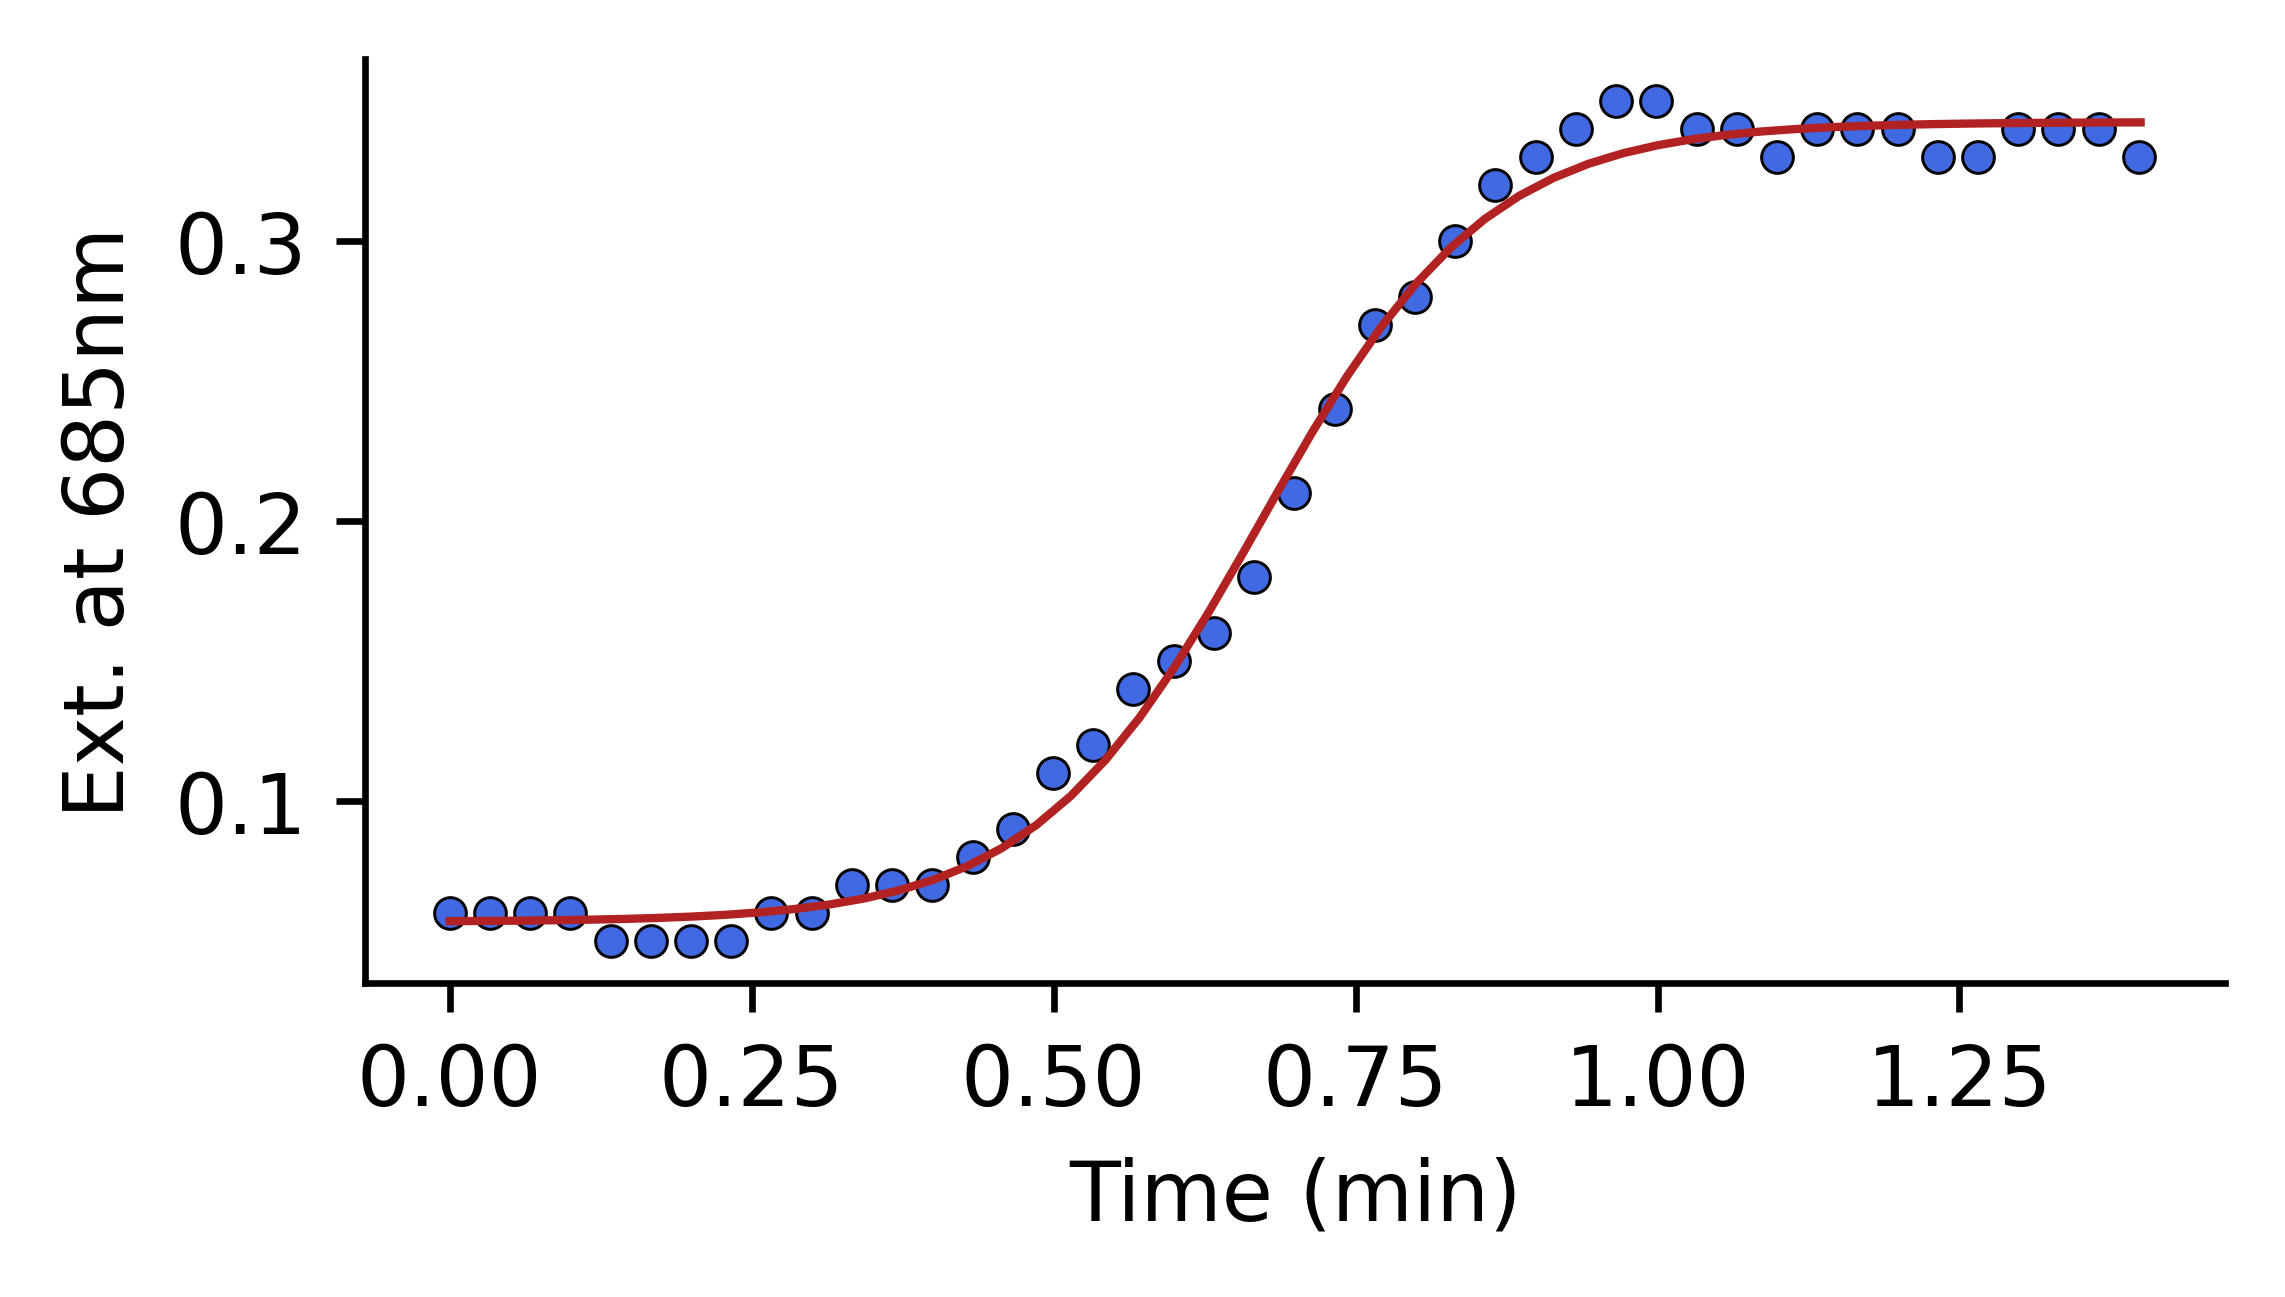

In [20]:
#========logiscic_growth===============#

# Define the logiscic_growth function
def logiscic_growth(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

# Fit the data to the exponential decay function
popt, pcov = curve_fit(logiscic_growth, times_cool_redisp, max_values_cool_redisp)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('d =', popt[3])
x_data = np.linspace(0,1.4)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.plot(x_data, logiscic_growth(x_data, popt[0], popt[1], popt[2], popt[3]), color='firebrick', linewidth = 1)
ax_kin.scatter(times_cool_redisp, max_values_cool_redisp, color='black', s=10)                           # plot data
ax_kin.scatter(times_cool_redisp, max_values_cool_redisp, color='royalblue', s=6)                           # plot data

#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Ext. at 685nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))
fig.savefig(RESULT_DIR_PATH+'Fig_2c_inset.png', transparent=True)

## Plot double y- redisp and aggregation in the same plot

a = 0.28562510018705717
b = 0.0569795986129288
c = 10.679005177623704
d = 0.6714162220453175
a = -0.5894997215370702
b = 0.16693709464244158
c = 0.8004988411119623


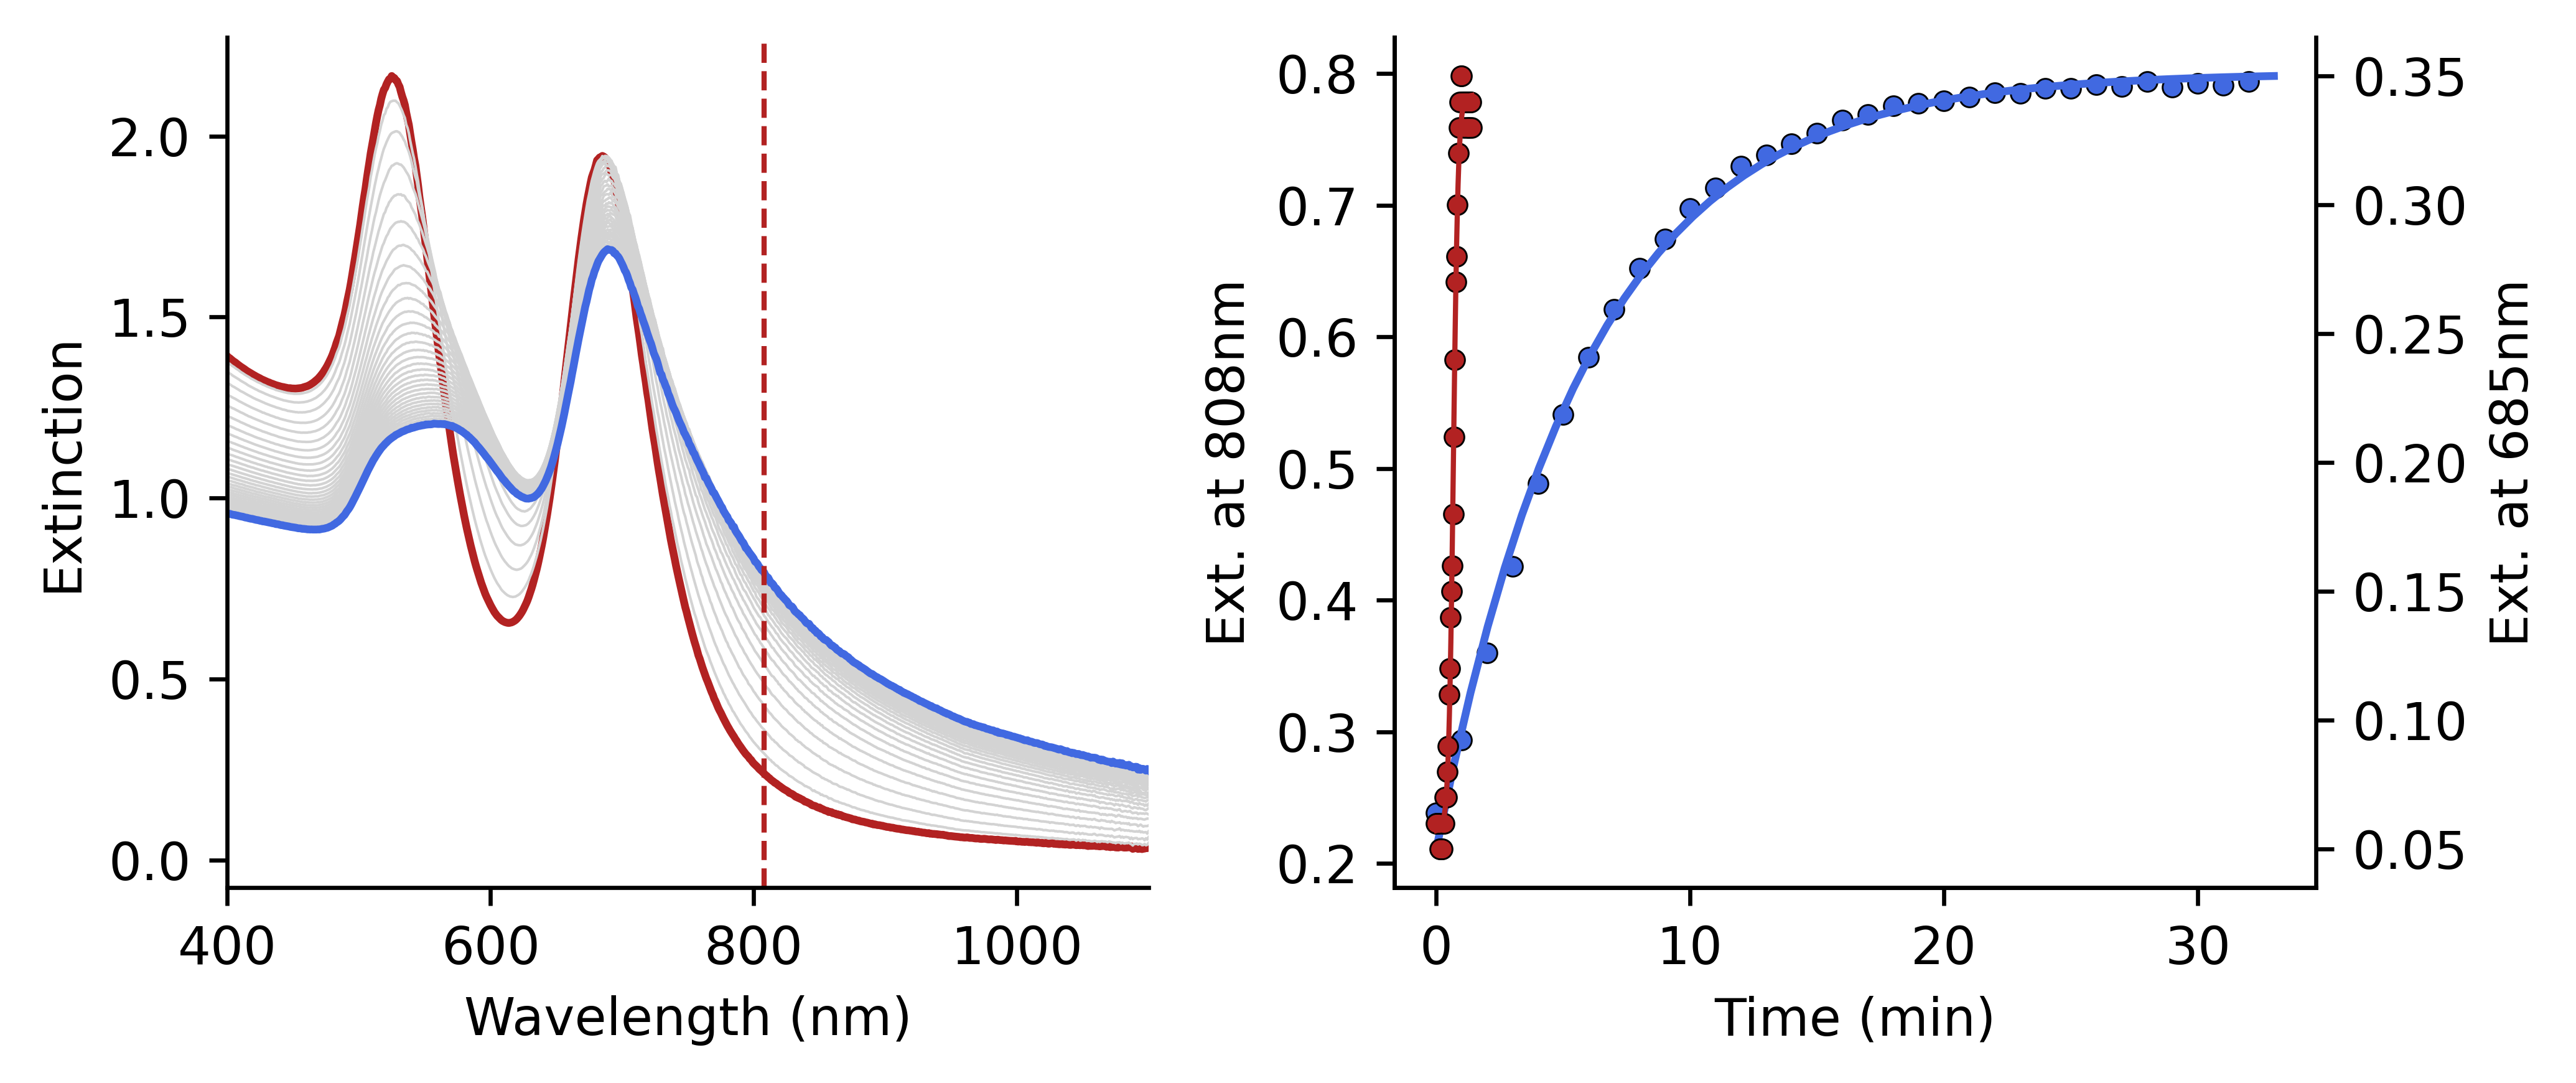

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#================ plot data showing aggregation ===========================#

fig = plt.figure(figsize=(7, 3), dpi=600)
gs = fig.add_gridspec(1, 2)  # nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0])  # upper left subplot
ax2 = fig.add_subplot(gs[0, 1])  # upper right subplot
ax3 = ax2.twinx()

for col in odd_cols_30.columns:  # Assuming odd_cols_30 is a DataFrame
    if col == 'Abs.7':
        color = 'firebrick'
        linewidth = 1.5
    elif col == 'Abs.39':
        color = 'royalblue'
        linewidth = 1.5
    else:
        color = 'lightgrey'
        linewidth = 0.5

    ax1.plot(df_30min.iloc[:, 0], odd_cols_30[col], color=color, linewidth=linewidth)

ax1.set_xlim([400, 1100])  # set wavelength limit
ax1.set_xlabel(r'Wavelength (nm)')  # set axis label
ax1.set_ylabel(r'Extinction')  # set axis label
ax1.axvline(808, color='firebrick', linewidth=1, linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plotting on the second subplot
times_30 = list(range(33))
ax2.scatter(times_30, odd_cols_808nm, color='black', s=10)  # plot data
ax2.scatter(times_30, odd_cols_808nm, color='royalblue', s=6)  # plot data
ax2.set_xlabel(r'Time (min)')  # set axis label
ax2.set_ylabel(r'Ext. at 808nm')  # set axis label
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, odd_cols_808nm)

#========logiscic_growth===============#

# Define the logiscic_growth function
def logiscic_growth(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

# Fit the data to the exponential decay function
popt_redisp, pcov_redisp = curve_fit(logiscic_growth, times_cool_redisp, max_values_cool_redisp)

# Print the fitted parameters
print('a =', popt_redisp[0])
print('b =', popt_redisp[1])
print('c =', popt_redisp[2])
print('d =', popt_redisp[3])
x_data_redisp = np.linspace(0,1.4)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0, 33)

ax2.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='royalblue')
ax3.plot(x_data_redisp, logiscic_growth(x_data_redisp, popt_redisp[0], popt_redisp[1], popt_redisp[2], popt_redisp[3]), color='firebrick', linewidth = 1)
ax3.scatter(times_cool_redisp, max_values_cool_redisp, color='black', s=10)                           # plot data
ax3.scatter(times_cool_redisp, max_values_cool_redisp, color='firebrick', s=6)                           # plot data
ax3.set_ylabel(r'Ext. at 685nm')  # set axis label
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)


plt.tight_layout()

fig.savefig(RESULT_DIR_PATH + '2c.pdf', transparent=True)

# old data

In [22]:
'''
Import data from the folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
txt_file_agg = natsorted(glob.glob(os.path.join(DATA_UV_DIR_PATH_REVERSIBILITY, 'agg', '', '*.txt')))
txt_file_disp = natsorted(glob.glob(os.path.join(DATA_UV_DIR_PATH_REVERSIBILITY, 'disp', '',  '*.txt')))

# Get the odd columns and even columns
#odd_cool = df_cool.iloc[:, 1::2]  # start from index 1 and select every other column
#odd_heat = df_heat.iloc[:, 1::2]  # start from index 1 and select every other column

#txt_file_agg

# For 15 cycles

In [23]:
max_abs_agg = []

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_agg.iloc[1069, 1].max(),2)
    max_abs_agg.append(absorbance_cool)

    # Plot the data
#     ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

# ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.7])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  

# times_cool_agg = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]
# print('abs. at lambda_max.', max_abs_agg)

In [24]:
max_abs_disp = []

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
    # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_disp.iloc[1069, 1].max(),2)
    max_abs_disp.append(absorbance_cool)

    # Plot the data
#     ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data

# ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.7])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  


# times_cool_disp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# print('abs. at lambda_max.', max_abs_disp)

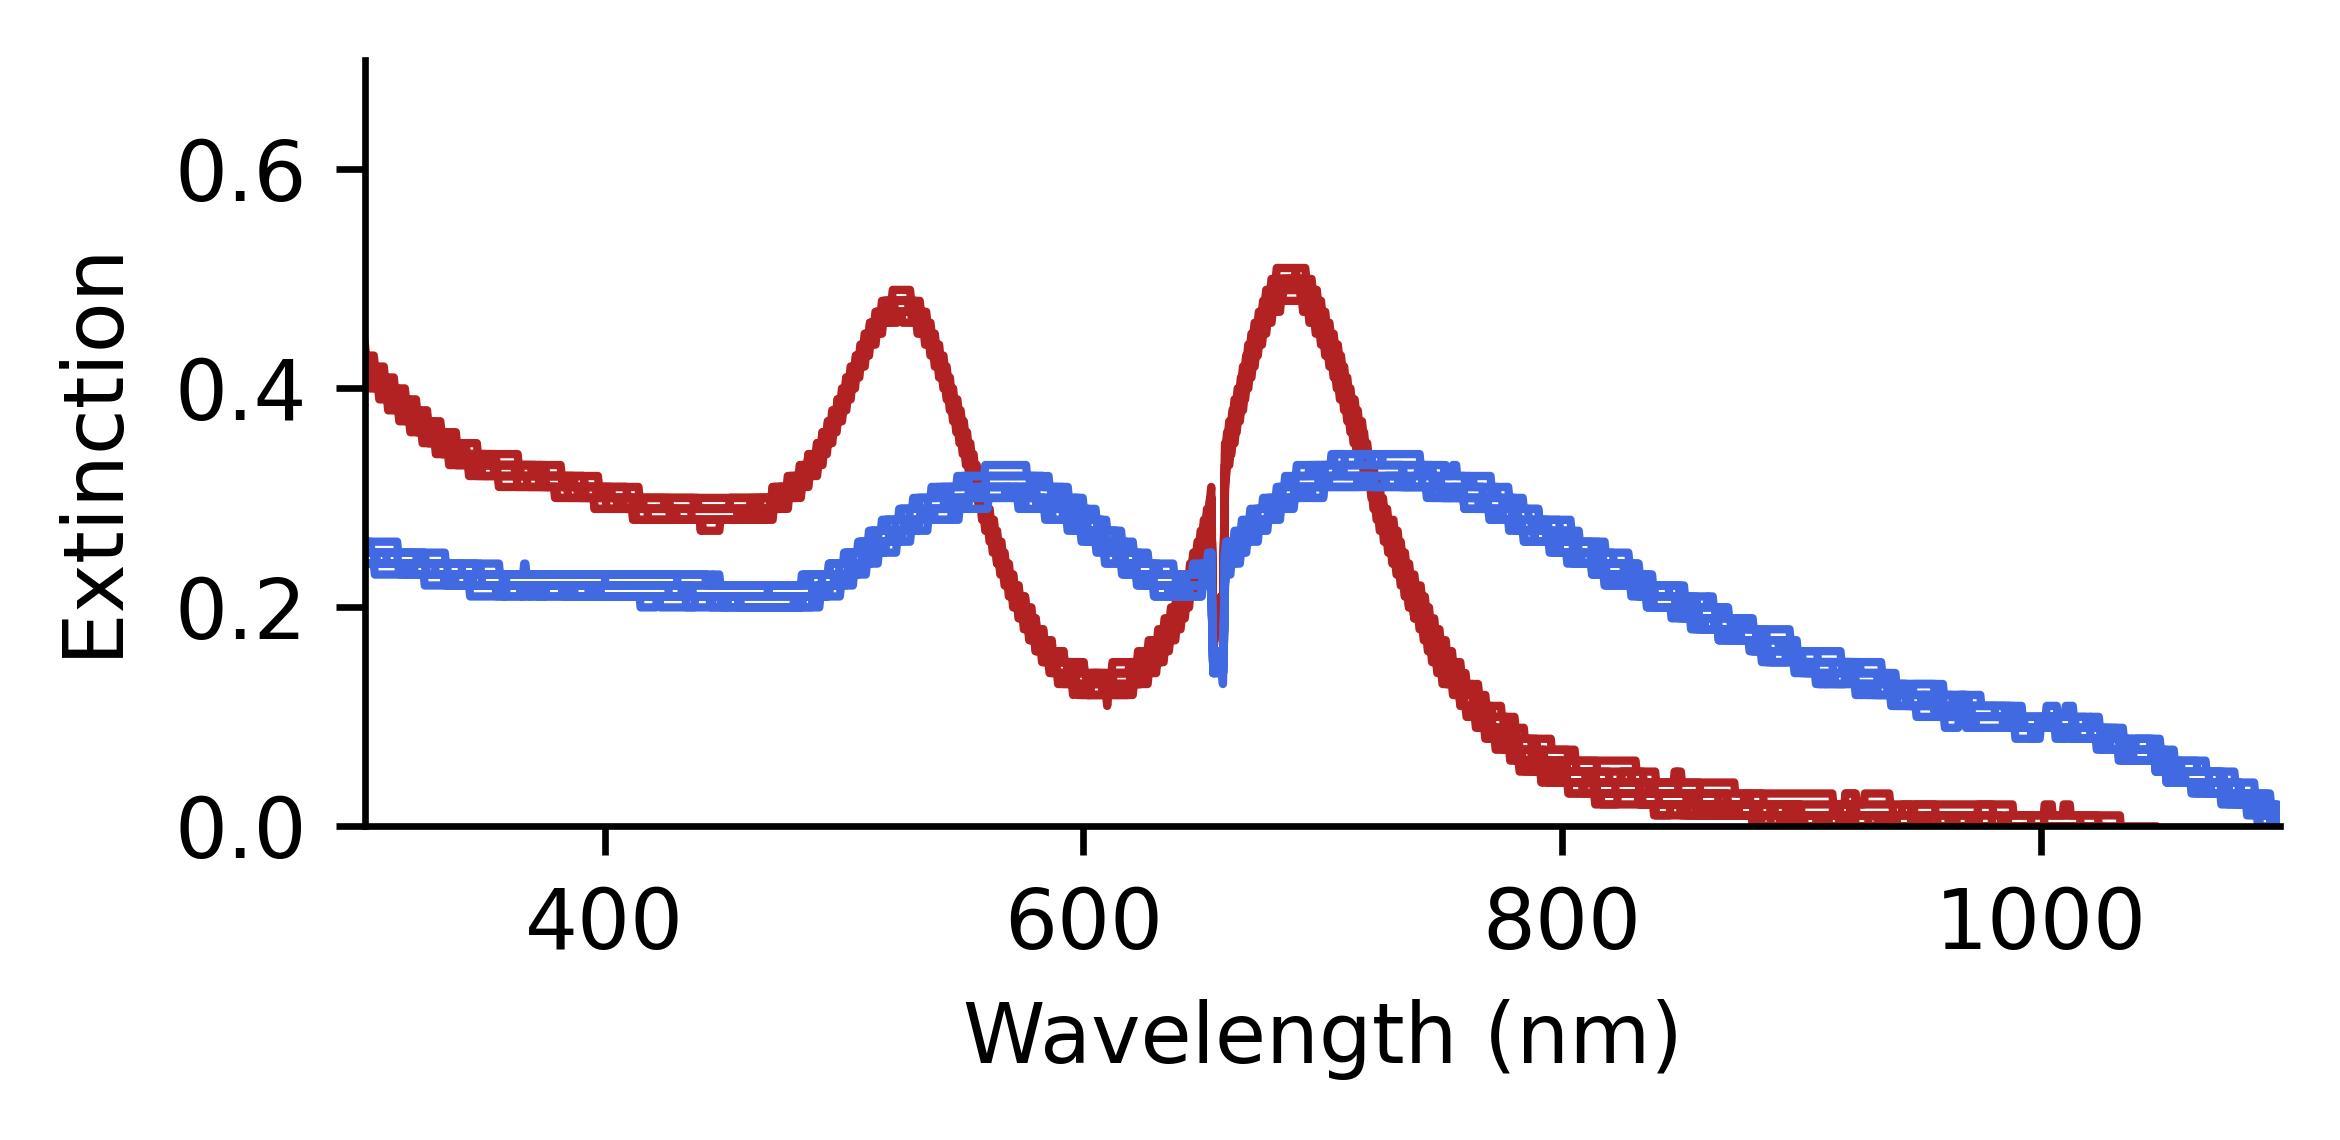

In [25]:
fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
        # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    
    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data
    
for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([300,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.savefig(RESULT_DIR_PATH+'Fig_S7.png', transparent=True)

# The extinction at 808nm

In [26]:
max_abs_agg = []

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_agg.iloc[1350, 1].max(),2)
    max_abs_agg.append(absorbance_cool)

    # Plot the data
#     ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

# ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.7])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  

times_cool_agg = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]
print('abs. at lambda_max.', max_abs_agg)

max_abs_disp = []

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
    # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_disp.iloc[1350, 1].max(),2)
    max_abs_disp.append(absorbance_cool)

    # Plot the data
#     ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data

# ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.7])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  


times_cool_disp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print('abs. at lambda_max.', max_abs_disp)

abs. at lambda_max. [0.25, 0.26, 0.26, 0.24, 0.24, 0.24, 0.26, 0.25, 0.25, 0.24, 0.25, 0.24, 0.24, 0.24]
abs. at lambda_max. [0.04, 0.06, 0.05, 0.03, 0.04, 0.04, 0.05, 0.05, 0.05, 0.04, 0.06, 0.04, 0.05, 0.03, 0.05]


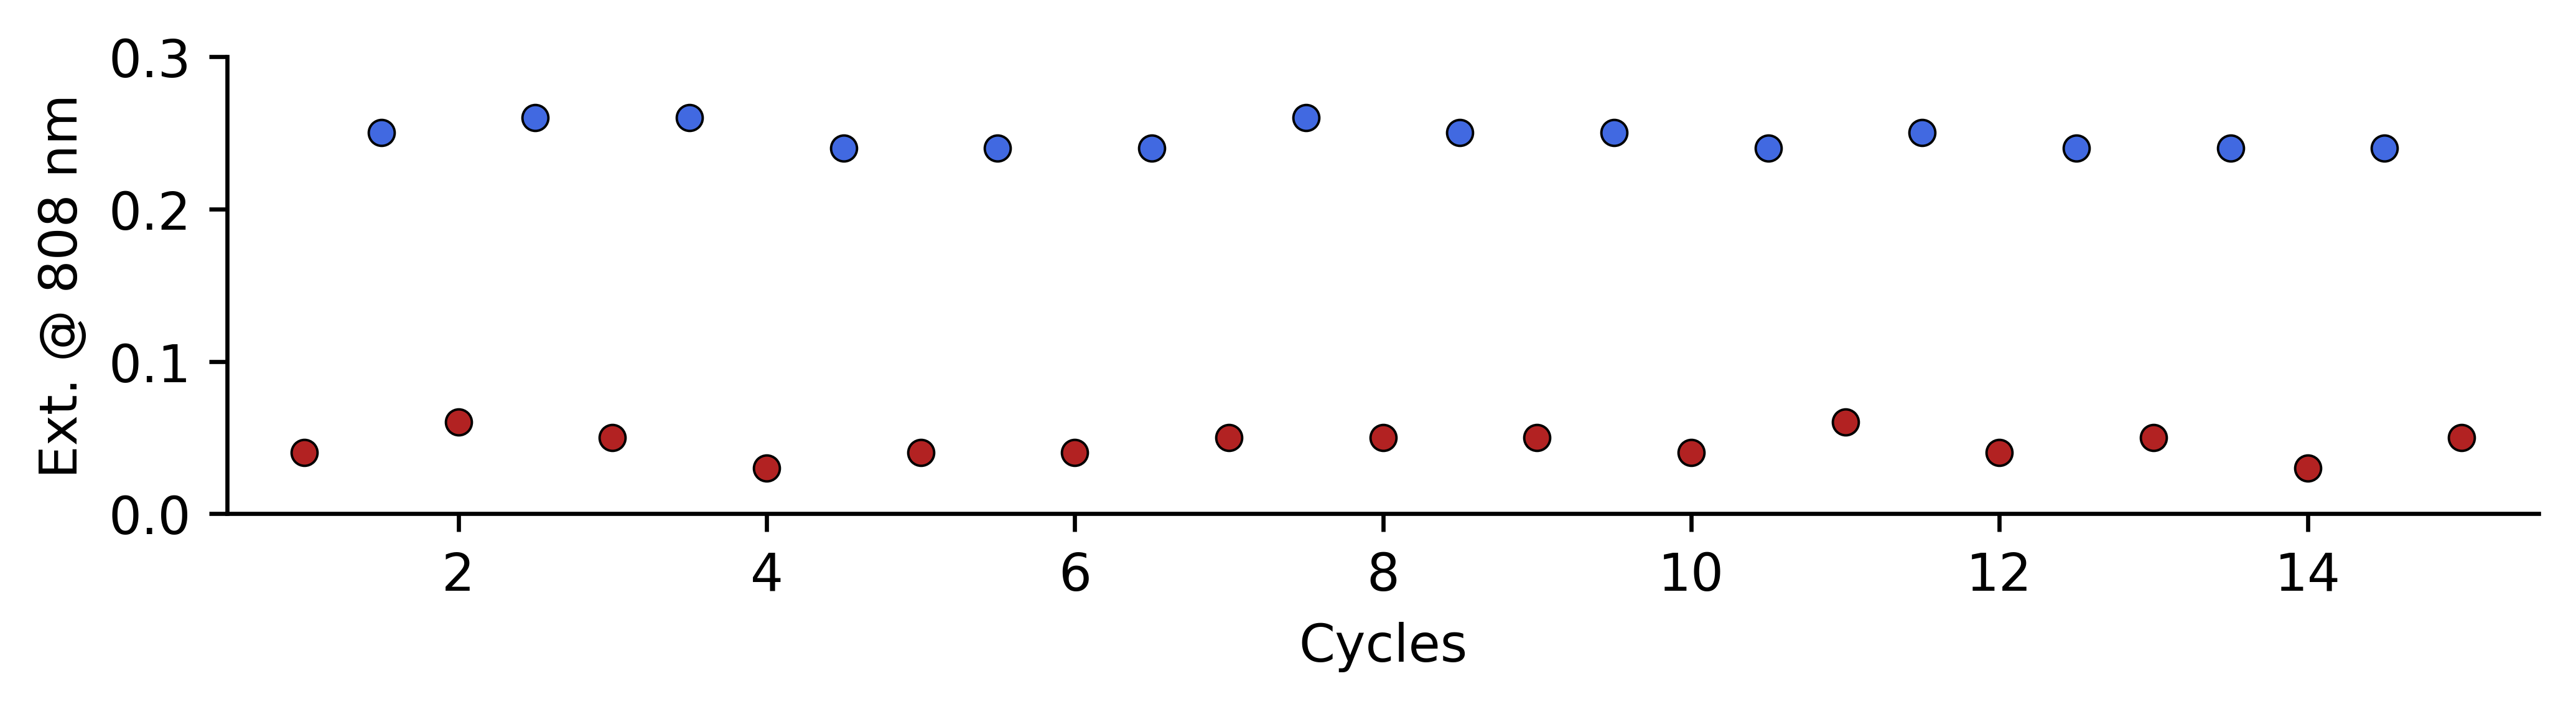

In [27]:
fig = plt.figure(figsize=(7,2), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.scatter(times_cool_agg, max_abs_agg, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_agg, max_abs_agg, color='royalblue', marker='.', s=50) 

ax_reversible.scatter(times_cool_disp, max_abs_disp, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_disp, max_abs_disp, color='firebrick', marker='.', s=50)                           

ax_reversible.set_xlim([0.5,15.5])                    # set wavelength limit
ax_reversible.set_ylim([0,0.3])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycles')          # set axis label
ax_reversible.set_ylabel(r'Ext. @ 808 nm')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)
plt.tight_layout()  

fig.savefig(RESULT_DIR_PATH+'Fig_2e.png', transparent=True)